<a href="https://colab.research.google.com/github/jeevitha16ds/jeevitha16ds/blob/main/Home_loan_risk_1006_file2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import basic libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## **Read the file**

In [ ]:
data = pd.read_csv('home_loan_new_data1.csv')
print(data.shape)
data

(307511, 33)


,Unnamed: 0,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,MONTHS_BALANCE,CNT_INSTALMENT_FUTURE,CNT_INSTALMENT,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,CREDIT_TYPE,MON_BALANCE,STATUS,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,WEEKDAY_APPR_PROCESS_START,NAME_GOODS_CATEGORY
0,0,M,Working,Secondary / secondary special,Laborers,2,10,Business Entity Type 3,0.262949,0.139376,-1134.0,1.0,1,-31,45.0,48.0,Closed,currency 1,0,0,Consumer credit,0,C,0.0,1,0.0,1.0,1.0,6,-1180.0,-1187.0,SATURDAY,Mobile
1,1,F,State servant,Higher education,Core staff,1,11,School,0.622246,0.535276,-828.0,0.0,0,-33,35.0,36.0,Active,currency 1,0,0,Credit card,-1,C,1.0,1,0.0,0.0,0.0,34,-2156.0,-2156.0,THURSDAY,XNA
2,2,M,Working,Secondary / secondary special,Laborers,2,9,Government,0.555912,0.729567,-815.0,0.0,0,-32,9.0,12.0,Active,currency 1,0,0,Consumer credit,-2,C,0.0,0,0.0,0.0,2.0,1,-63.0,-63.0,TUESDAY,XNA
3,3,F,Working,Secondary / secondary special,Laborers,2,17,Business Entity Type 3,0.650442,0.535276,-617.0,1.0,0,-35,42.0,48.0,Active,currency 1,0,0,Credit card,-3,C,1.0,1,0.0,0.0,1.0,3,-2418.0,-2426.0,MONDAY,XNA
4,4,M,Working,Secondary / secondary special,Core staff,2,11,Religion,0.322738,0.535276,-1106.0,0.0,0,-35,35.0,36.0,Active,currency 1,0,0,Consumer credit,-4,C,0.0,1,0.0,1.0,1.0,2,-1383.0,-1366.0,THURSDAY,XNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,307506,M,Working,Secondary / secondary special,Sales staff,1,15,Services,0.681632,0.535276,-273.0,1.0,0,-10,2.0,12.0,Active,currency 1,0,0,Consumer credit,-9,C,0.0,0,0.0,0.0,1.0,17,-104.0,-104.0,TUESDAY,XNA
307507,307507,F,Pensioner,Secondary / secondary special,Laborers,2,8,XNA,0.115992,0.535276,0.0,1.0,0,-16,0.0,16.0,Closed,currency 1,0,0,Consumer credit,-10,C,0.0,0,0.0,0.0,1.0,1,-197.0,-209.0,WEDNESDAY,XNA
307508,307508,F,Working,Higher education,Managers,3,9,School,0.535722,0.218859,-1909.0,1.0,0,-19,1.0,12.0,Closed,currency 1,0,0,Consumer credit,-11,C,0.0,0,0.0,0.0,1.0,1,-1664.0,-1667.0,WEDNESDAY,XNA
307509,307509,F,Commercial associate,Secondary / secondary special,Laborers,2,9,Business Entity Type 1,0.514163,0.661024,-322.0,0.0,1,-10,5.0,18.0,Closed,currency 1,0,0,Consumer credit,-12,C,3.0,3,0.0,0.0,0.0,15,-1929.0,-1926.0,TUESDAY,XNA


In [ ]:
data=data.drop(data[['Unnamed: 0']],axis=1)

In [ ]:
data.head()

,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,MONTHS_BALANCE,CNT_INSTALMENT_FUTURE,CNT_INSTALMENT,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,CREDIT_TYPE,MON_BALANCE,STATUS,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,WEEKDAY_APPR_PROCESS_START,NAME_GOODS_CATEGORY
0,M,Working,Secondary / secondary special,Laborers,2,10,Business Entity Type 3,0.262949,0.139376,-1134.0,1.0,1,-31,45.0,48.0,Closed,currency 1,0,0,Consumer credit,0,C,0.0,1,0.0,1.0,1.0,6,-1180.0,-1187.0,SATURDAY,Mobile
1,F,State servant,Higher education,Core staff,1,11,School,0.622246,0.535276,-828.0,0.0,0,-33,35.0,36.0,Active,currency 1,0,0,Credit card,-1,C,1.0,1,0.0,0.0,0.0,34,-2156.0,-2156.0,THURSDAY,XNA
2,M,Working,Secondary / secondary special,Laborers,2,9,Government,0.555912,0.729567,-815.0,0.0,0,-32,9.0,12.0,Active,currency 1,0,0,Consumer credit,-2,C,0.0,0,0.0,0.0,2.0,1,-63.0,-63.0,TUESDAY,XNA
3,F,Working,Secondary / secondary special,Laborers,2,17,Business Entity Type 3,0.650442,0.535276,-617.0,1.0,0,-35,42.0,48.0,Active,currency 1,0,0,Credit card,-3,C,1.0,1,0.0,0.0,1.0,3,-2418.0,-2426.0,MONDAY,XNA
4,M,Working,Secondary / secondary special,Core staff,2,11,Religion,0.322738,0.535276,-1106.0,0.0,0,-35,35.0,36.0,Active,currency 1,0,0,Consumer credit,-4,C,0.0,1,0.0,1.0,1.0,2,-1383.0,-1366.0,THURSDAY,XNA


## **Exploratory Data Analysis**

In [ ]:
#EDA
data.describe().T

,count,mean,std,min,25%,50%,75%,max
REGION_RATING_CLIENT_W_CITY,307511.0,2.031521,0.502737,1.000000e+00,2.000000,2.000000,2.000000,3.00000
HOUR_APPR_PROCESS_START,307511.0,12.063419,3.265832,0.000000e+00,10.000000,12.000000,14.000000,23.00000
EXT_SOURCE_2,307511.0,0.514503,0.190870,8.173617e-08,0.392974,0.565961,0.663422,0.85500
EXT_SOURCE_3,307511.0,0.515695,0.174736,5.272652e-04,0.417100,0.535276,0.636376,0.89601
DAYS_LAST_PHONE_CHANGE,307511.0,-962.858119,826.807226,-4.292000e+03,-1570.000000,-757.000000,-274.000000,0.00000
AMT_REQ_CREDIT_BUREAU_YEAR,307511.0,1.778463,1.765523,0.000000e+00,1.000000,1.000000,3.000000,25.00000
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.00000
MONTHS_BALANCE,307511.0,-25.887360,23.072436,-9.600000e+01,-39.000000,-17.000000,-10.000000,-1.00000
CNT_INSTALMENT_FUTURE,307511.0,12.963696,12.775292,0.000000e+00,4.000000,9.000000,18.000000,70.00000
CNT_INSTALMENT,307511.0,20.371505,14.026136,1.000000e+00,10.000000,14.000000,24.000000,72.00000


# **Value counts of Target variable**

Text(0.5, 1.0, 'TARGET ')

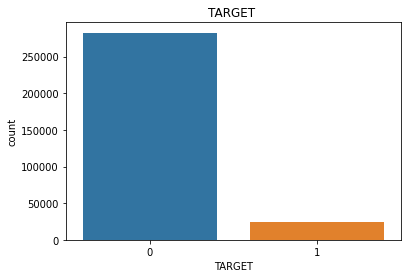

In [ ]:
sns.countplot(data.TARGET)
plt.title('TARGET ')

Text(0.5, 1.0, 'CODE GENDER')

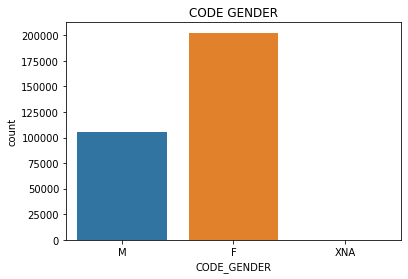

In [ ]:
sns.countplot(data.CODE_GENDER)
plt.title('CODE GENDER')

Text(0.5, 1.0, 'CREDIT ACTIVE')

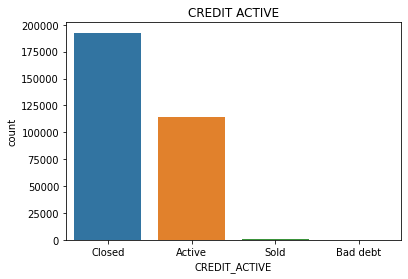

In [ ]:
sns.countplot(data.CREDIT_ACTIVE)
plt.title('CREDIT ACTIVE')

Text(0.5, 1.0, 'STATUS')

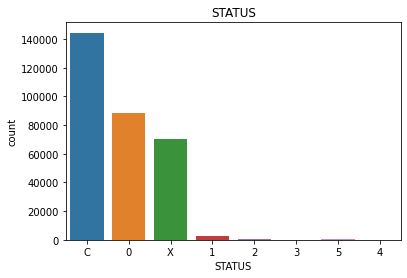

In [ ]:
sns.countplot(data.STATUS)
plt.title('STATUS')

## **data distribution of Numerical columns**

Text(0.5, 1.0, 'distribution of Numerical data')

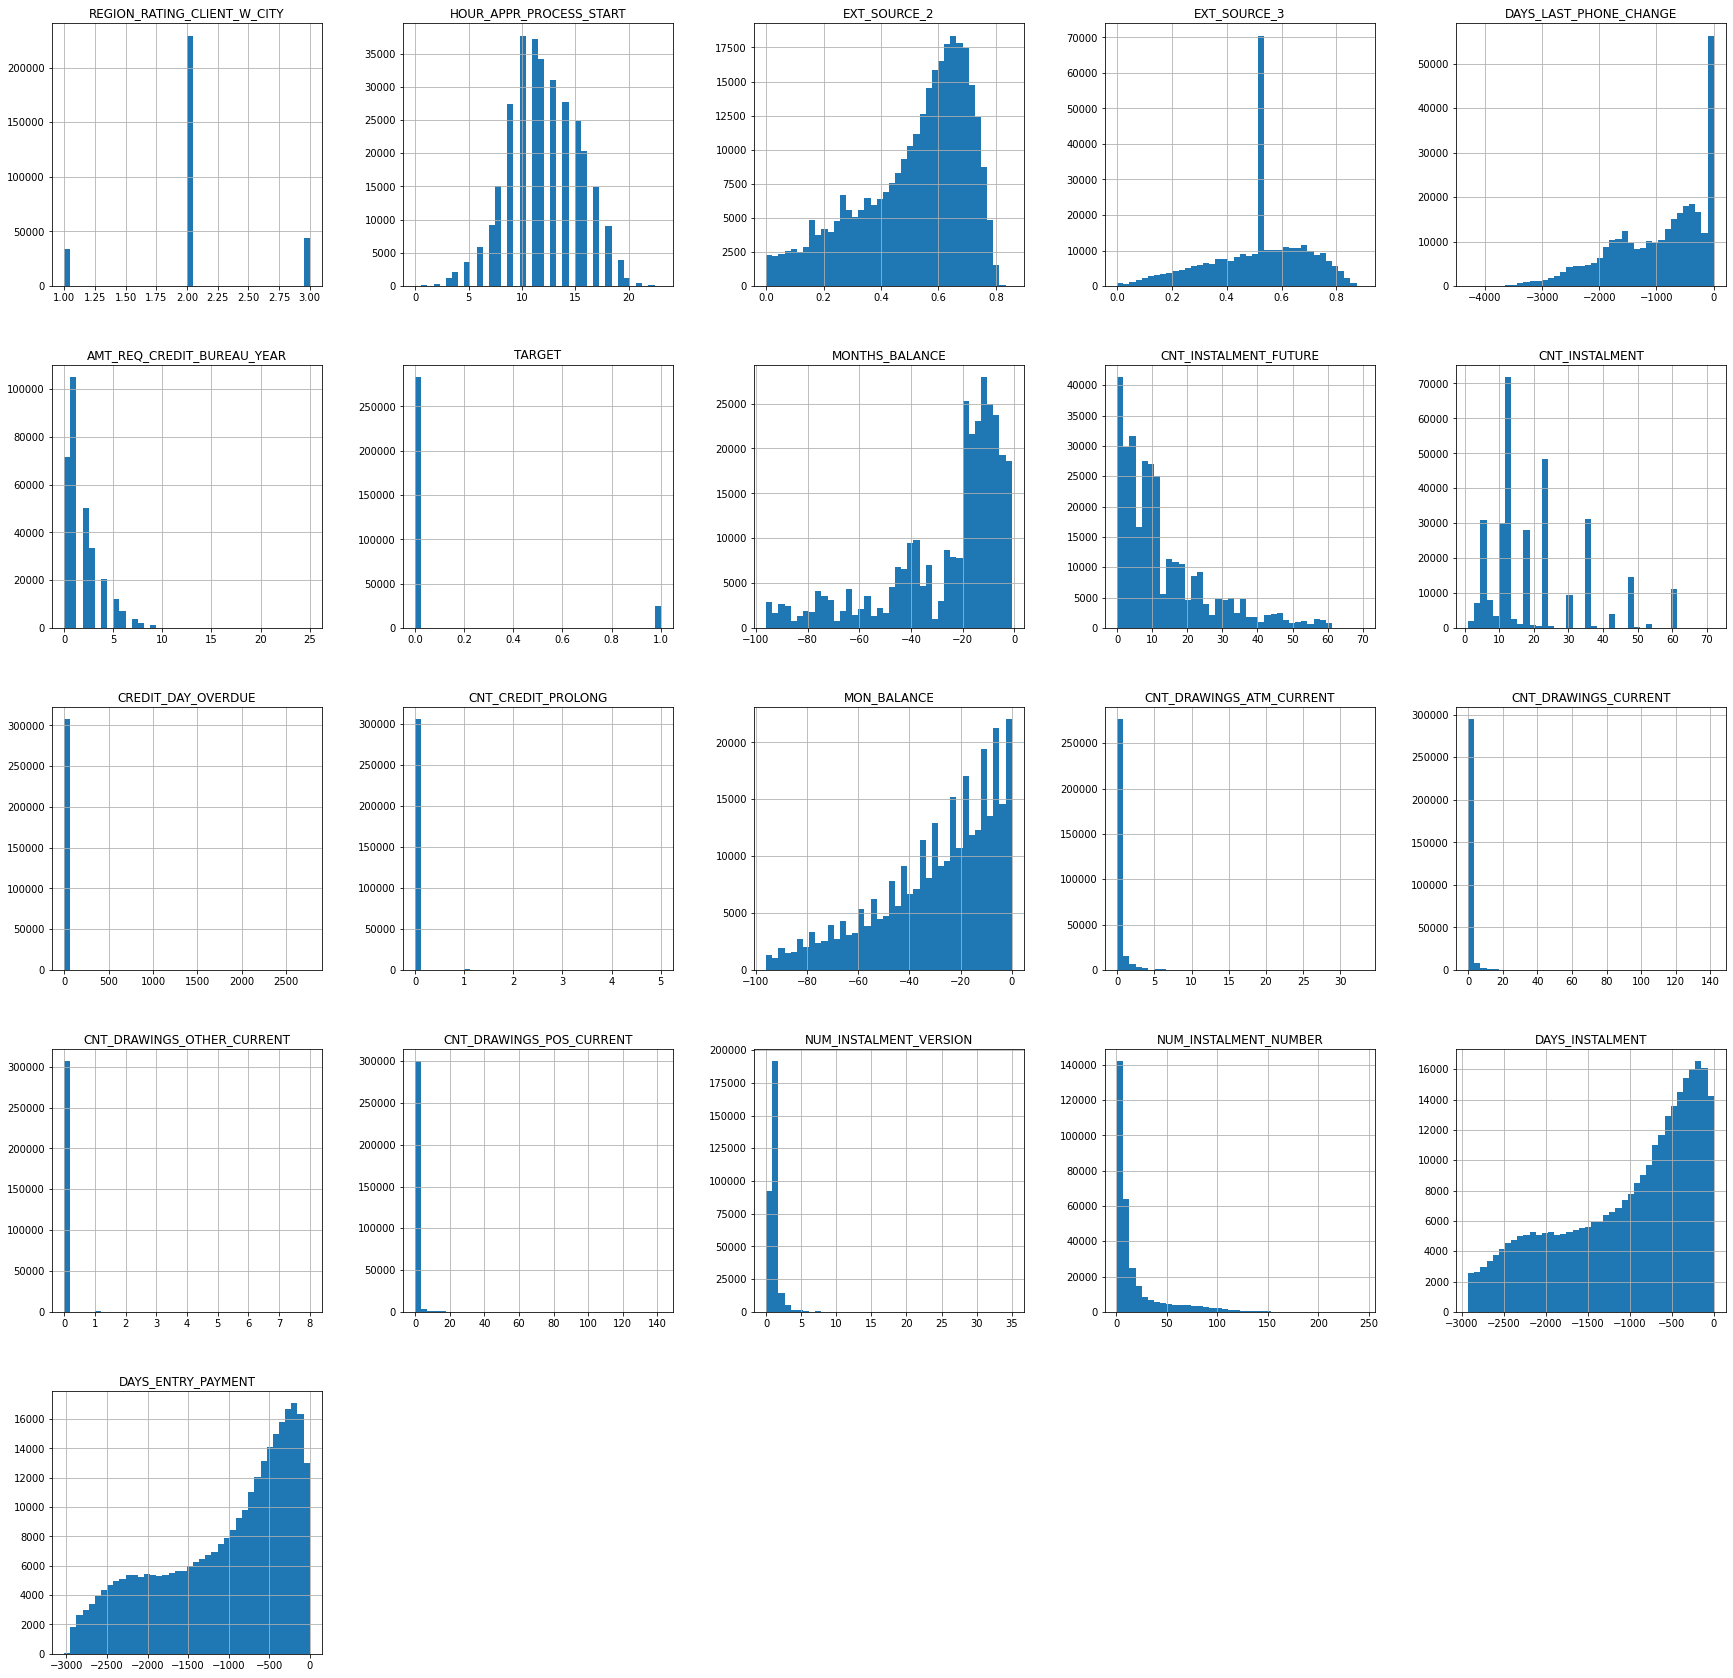

In [ ]:
data_num=data.select_dtypes(include=['float64','int64'])
data.shape
data_num.hist(figsize=(30,30),bins=40,xlabelsize=10,ylabelsize=10)
plt.title('distribution of Numerical data')

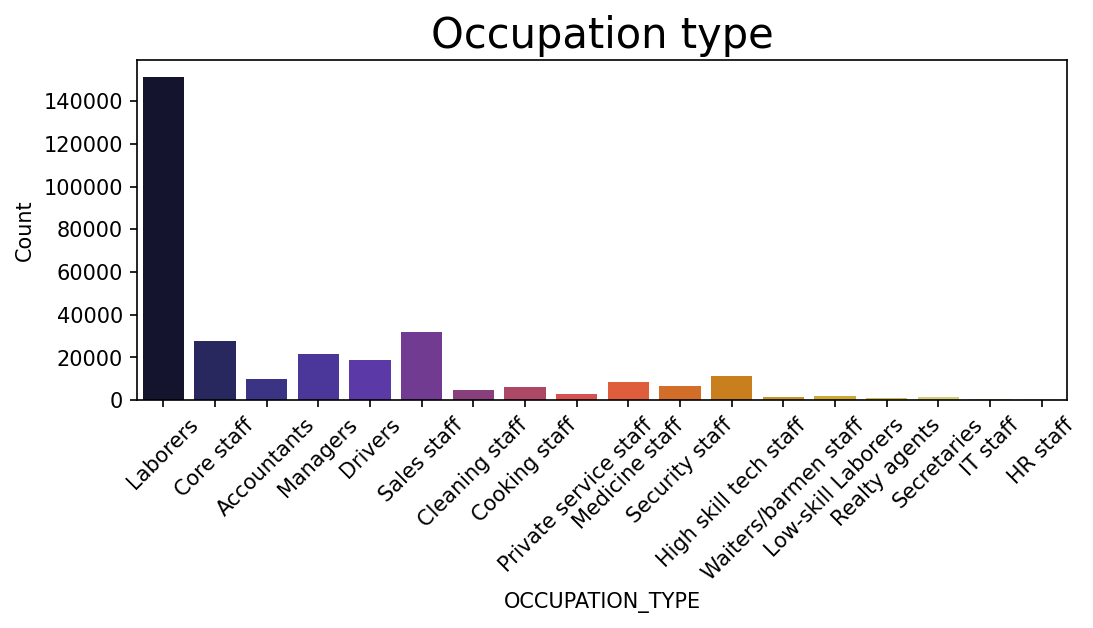

In [ ]:
plt.figure(figsize=(8,3),dpi=150)
sns.countplot(x='OCCUPATION_TYPE',data=data,palette='CMRmap')
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Occupation type',fontsize = 20)
plt.show()

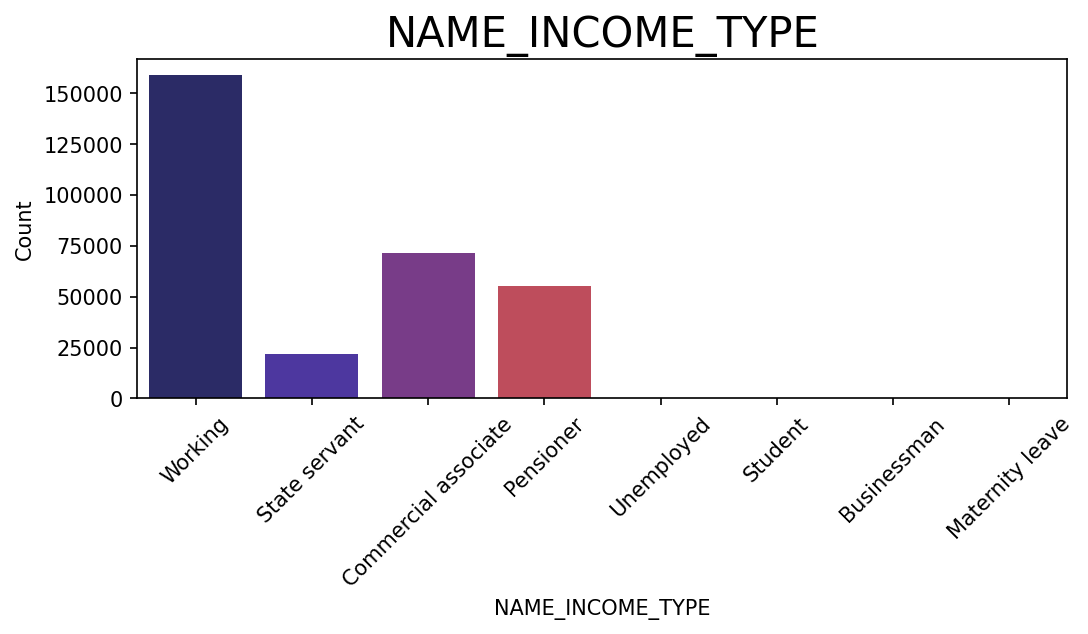

In [ ]:

plt.figure(figsize=(8,3),dpi=150)
sns.countplot(x='NAME_INCOME_TYPE',data=data,palette='CMRmap')
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('NAME_INCOME_TYPE',fontsize = 20)
plt.show()

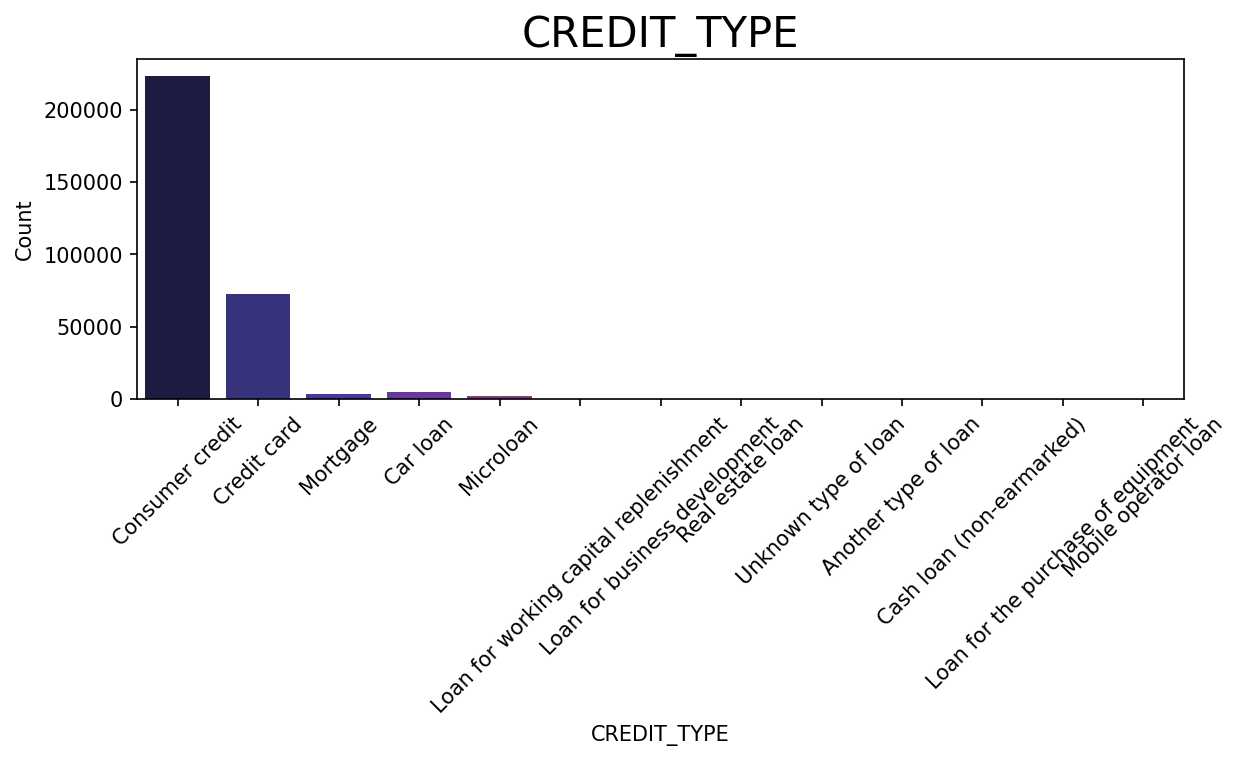

In [ ]:
plt.figure(figsize=(9,3),dpi=150)
sns.countplot(x='CREDIT_TYPE',data=data,palette='CMRmap')
plt.xlabel('CREDIT_TYPE')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('CREDIT_TYPE',fontsize = 20)
plt.show()

##**Correlation**

In [ ]:
data.corr()

,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET,MONTHS_BALANCE,CNT_INSTALMENT_FUTURE,CNT_INSTALMENT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,MON_BALANCE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT
REGION_RATING_CLIENT_W_CITY,1.000000,-0.264815,-0.288013,-0.011342,0.025717,0.010670,0.060893,0.003735,-0.002043,-0.001206,0.000795,0.000432,-0.001153,-0.000835,-0.001710,-0.001332,-0.001541,0.001339,-0.001505,-0.002741,-0.002755
HOUR_APPR_PROCESS_START,-0.264815,1.000000,0.156631,-0.037462,-0.014902,-0.025262,-0.024166,0.000220,-0.000270,0.000710,0.000896,0.000538,0.003096,-0.001175,0.002780,0.002595,0.003449,-0.000106,-0.001277,0.000993,0.000944
EXT_SOURCE_2,-0.288013,0.156631,1.000000,0.094147,-0.195460,-0.012479,-0.160295,-0.001092,0.000400,0.001036,0.000844,-0.000895,0.002297,0.000514,0.000681,0.002672,0.000481,0.001143,0.001053,0.004433,0.004539
EXT_SOURCE_3,-0.011342,-0.037462,0.094147,1.000000,-0.063544,-0.074743,-0.155892,-0.003163,-0.000879,-0.002369,0.000809,-0.000910,0.002182,0.002094,0.002707,-0.000814,0.002237,0.002647,-0.000473,0.000232,0.000185
DAYS_LAST_PHONE_CHANGE,0.025717,-0.014902,-0.195460,-0.063544,1.000000,-0.116385,0.055218,-0.001546,0.000011,0.000114,-0.000252,0.000979,0.003331,-0.001119,-0.000332,0.000875,0.000028,0.001604,-0.000911,-0.004646,-0.004733
AMT_REQ_CREDIT_BUREAU_YEAR,0.010670,-0.025262,-0.012479,-0.074743,-0.116385,1.000000,0.012161,-0.001799,-0.000421,-0.000429,0.001588,0.002307,-0.004668,-0.000887,-0.000708,-0.003284,-0.000352,0.000158,-0.000148,-0.001439,-0.001488
TARGET,0.060893,-0.024166,-0.160295,-0.155892,0.055218,0.012161,1.000000,0.002775,0.002734,0.001338,-0.001815,-0.000495,-0.005262,0.001212,-0.001764,-0.001716,-0.002363,0.002511,0.000626,-0.003955,-0.004046
MONTHS_BALANCE,0.003735,0.000220,-0.001092,-0.003163,-0.001546,-0.001799,0.002775,1.000000,0.322062,0.409009,-0.000801,0.000782,-0.017770,-0.002777,-0.005452,0.002119,-0.005063,0.002190,-0.000058,0.000467,0.000420
CNT_INSTALMENT_FUTURE,-0.002043,-0.000270,0.000400,-0.000879,0.000011,-0.000421,0.002734,0.322062,1.000000,0.883542,0.002330,-0.000972,-0.002381,-0.006940,-0.004377,0.003910,-0.002353,-0.001987,-0.002080,0.000005,-0.000047
CNT_INSTALMENT,-0.001206,0.000710,0.001036,-0.002369,0.000114,-0.000429,0.001338,0.409009,0.883542,1.000000,0.002045,-0.001441,-0.004937,-0.007427,-0.005804,0.003017,-0.003725,-0.000683,-0.002583,0.001077,0.001038


##**Heat Map**

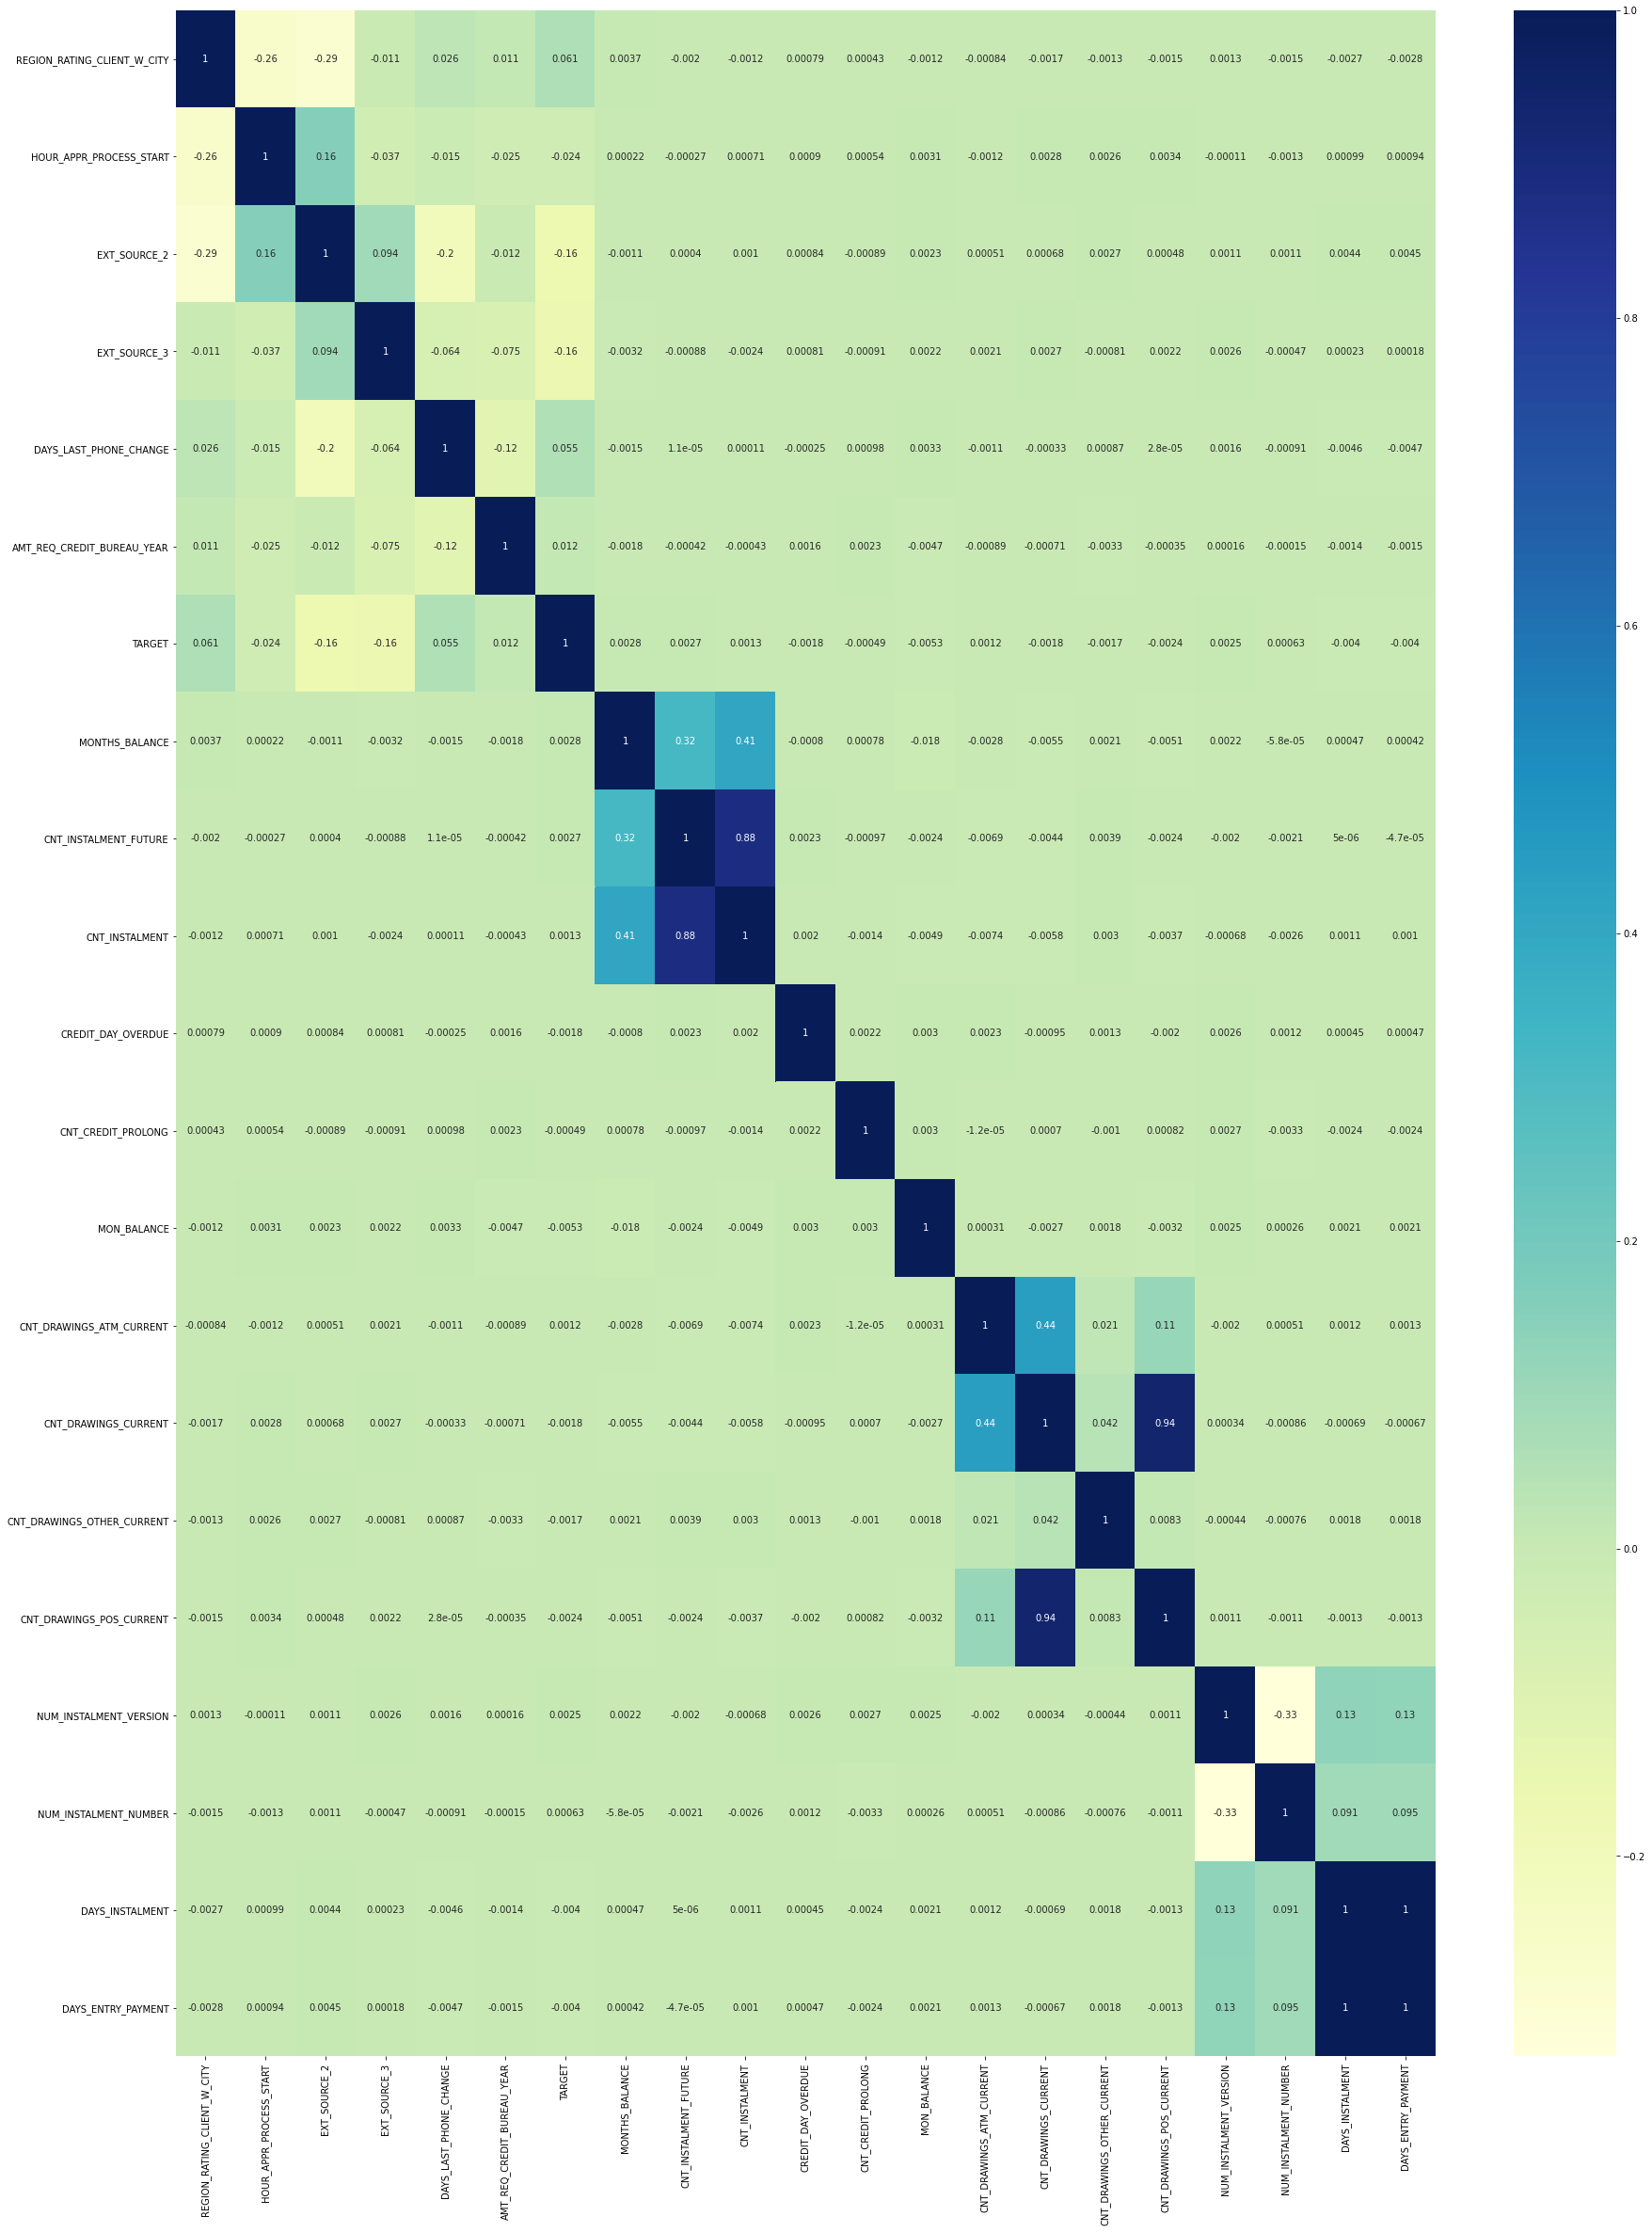

In [ ]:
# plotting Heat map
corr=data.corr()
plt.subplots(figsize=(30,40))
sns.heatmap(corr ,cmap="YlGnBu",annot=True)

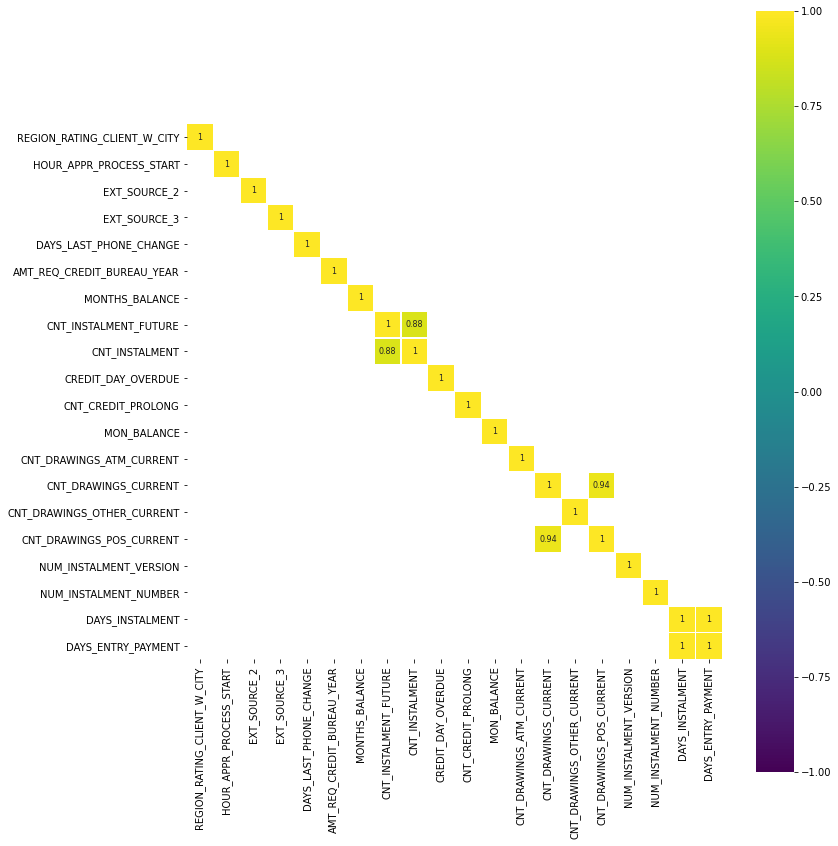

In [ ]:
#Feature to Feature Relationships using heatmap
num_data=data.select_dtypes(include=['int','float'])
fea_corr=num_data.drop('TARGET',axis=1).corr()
plt.subplots(figsize=(12,14))
sns.heatmap(fea_corr[(fea_corr>=0.5)|(fea_corr<=-0.4)],
              cmap='viridis',vmax=1.0,vmin=-1.0, linewidths= 0.4,
                 annot=True,annot_kws={"size":8},square=True) ;  

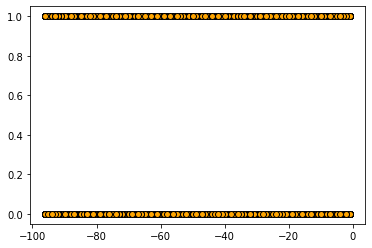

In [ ]:
plt.scatter(data.MONTHS_BALANCE,data.TARGET,color='orange',edgecolor='k')

In [ ]:
num_data1=data.select_dtypes(include=['int','float']).columns
cat_data1=data.select_dtypes(include=['object']).columns
continuous=[var for var in num_data1 if var not in cat_data1 and var not in ['SalePrice']]
print(continuous)

['REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'TARGET', 'MONTHS_BALANCE', 'CNT_INSTALMENT_FUTURE', 'CNT_INSTALMENT', 'CREDIT_DAY_OVERDUE', 'CNT_CREDIT_PROLONG', 'MON_BALANCE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT']


##**Visualising the outliers using Boxplot**

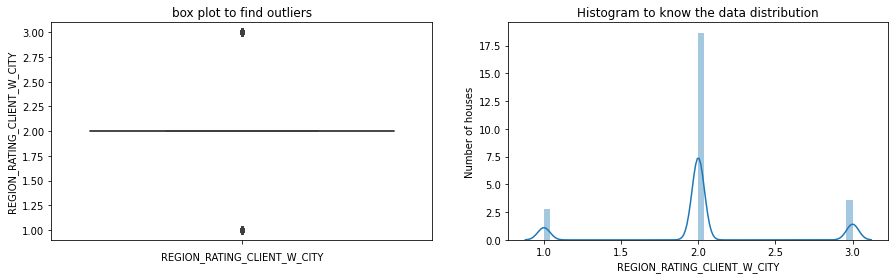

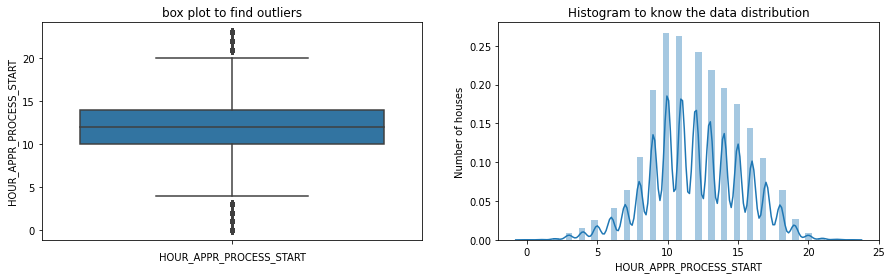

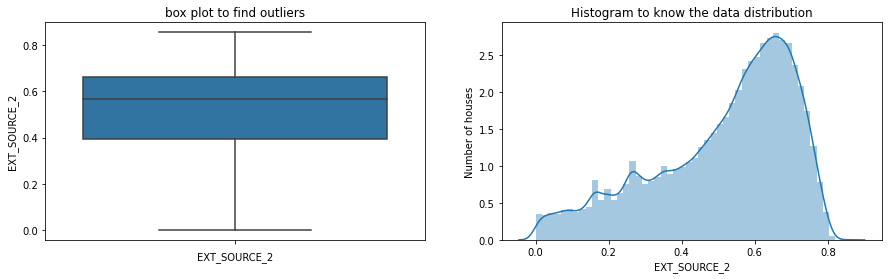

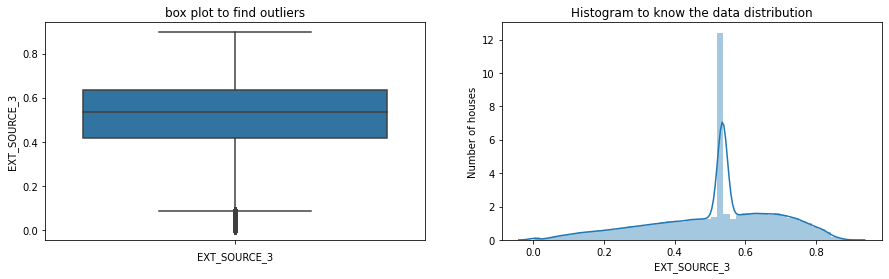

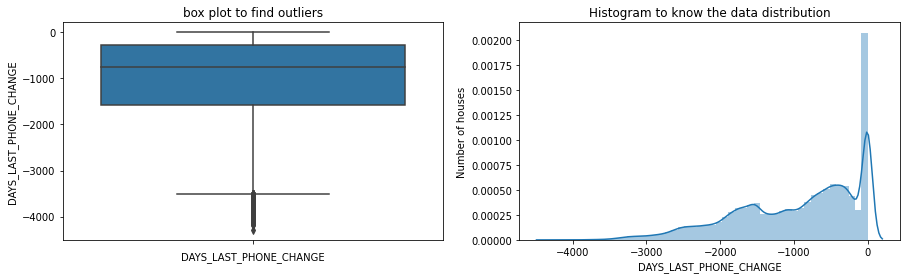

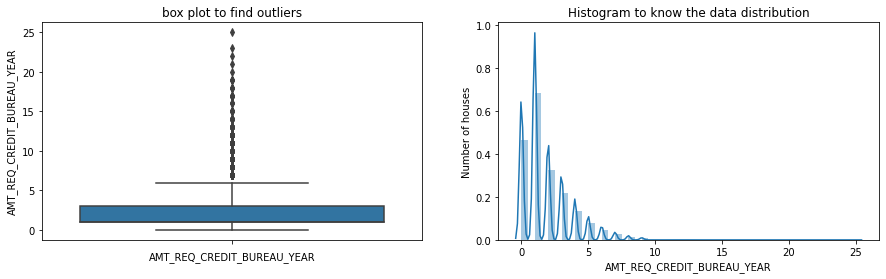

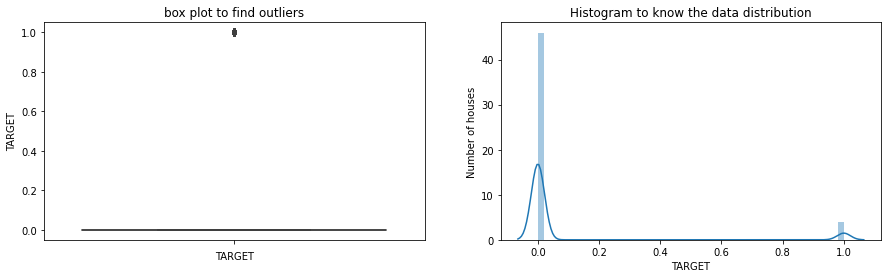

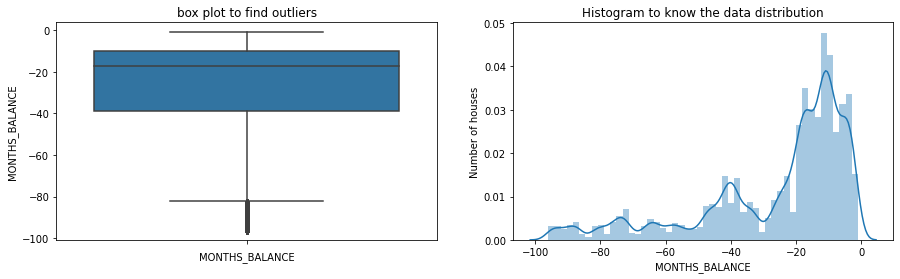

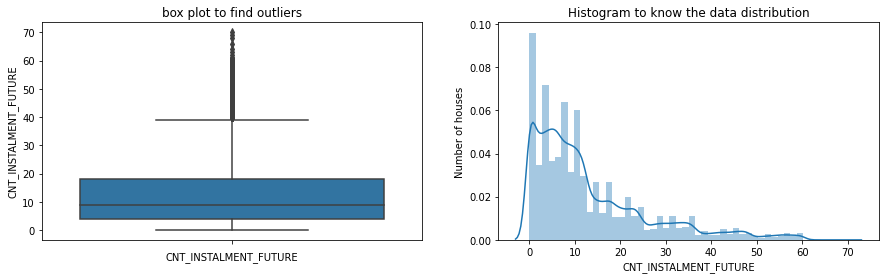

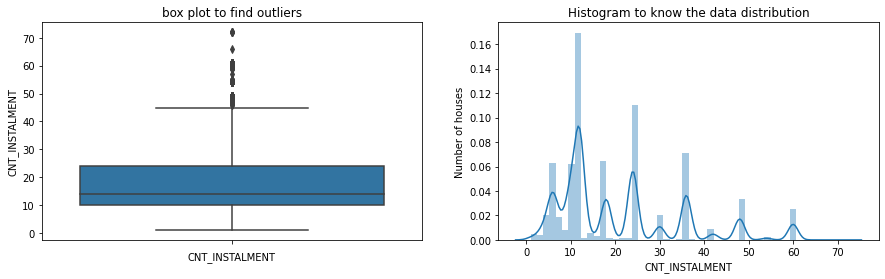

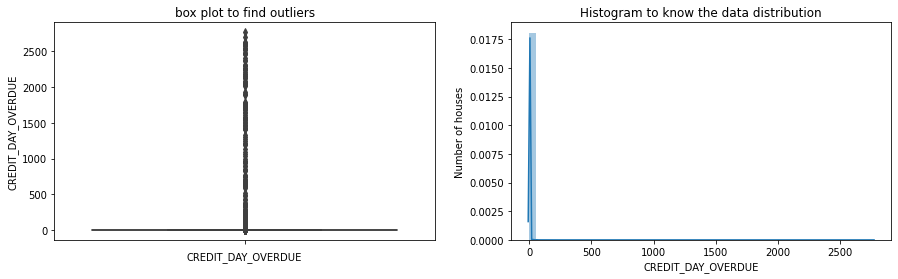

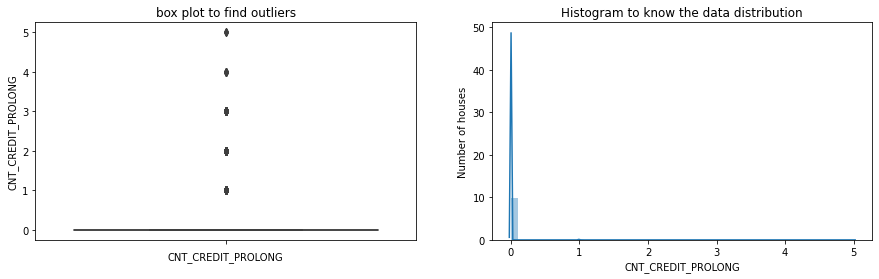

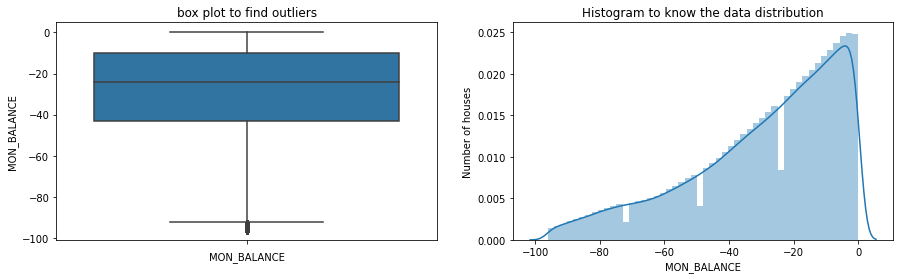

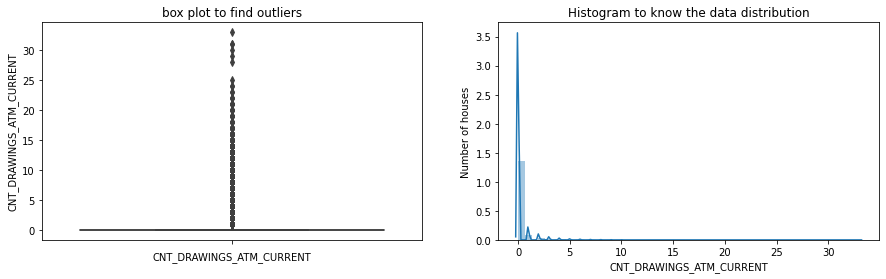

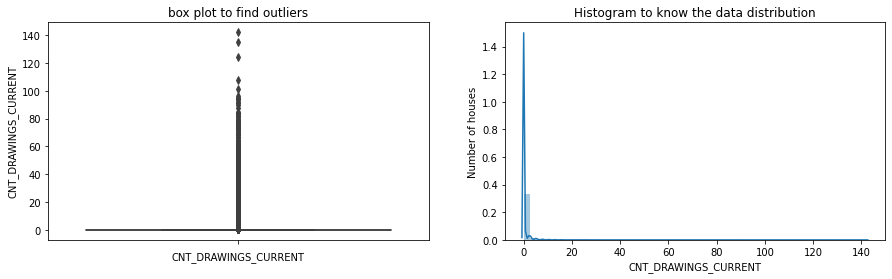

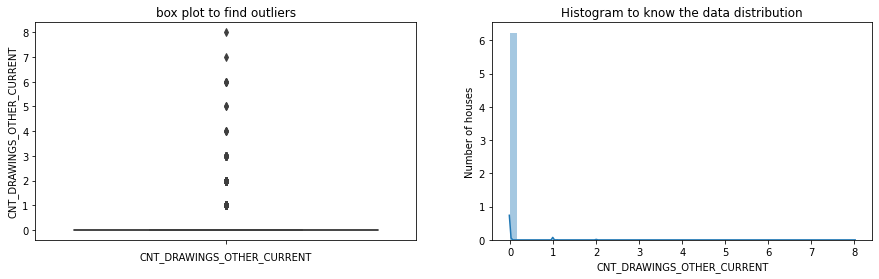

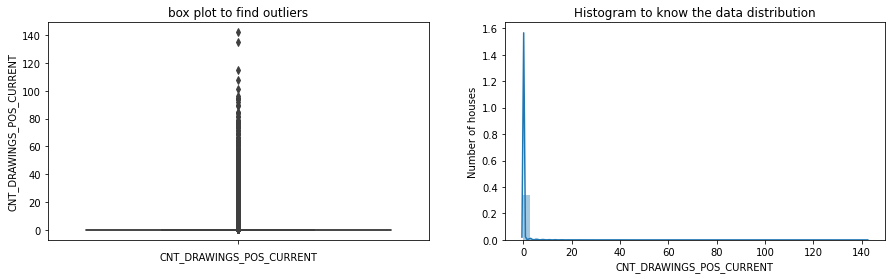

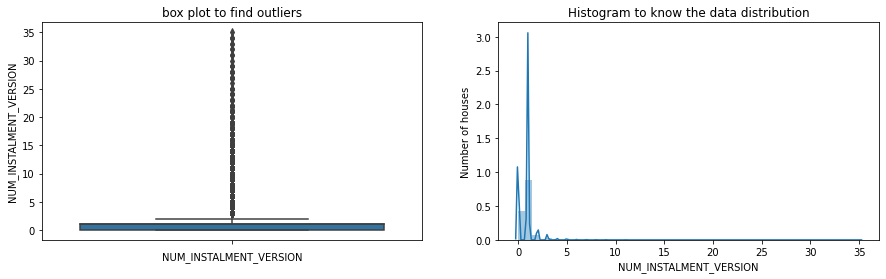

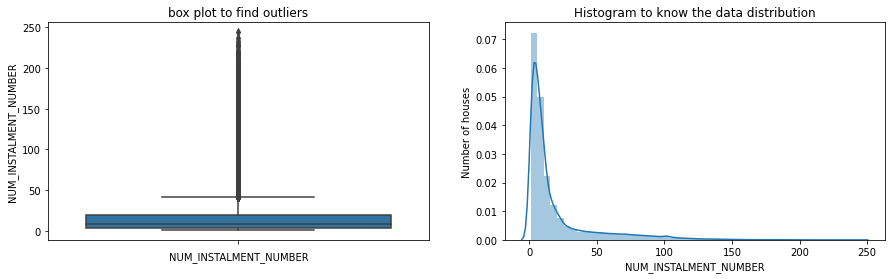

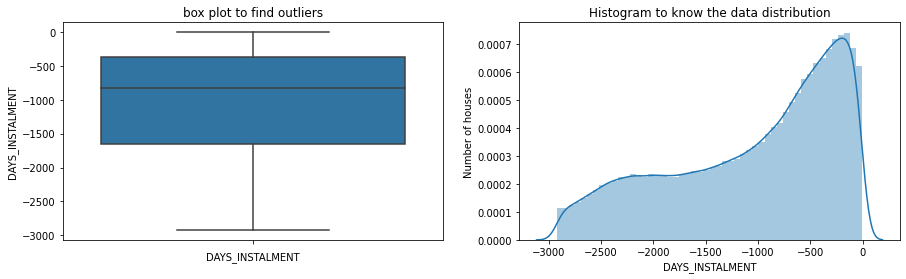

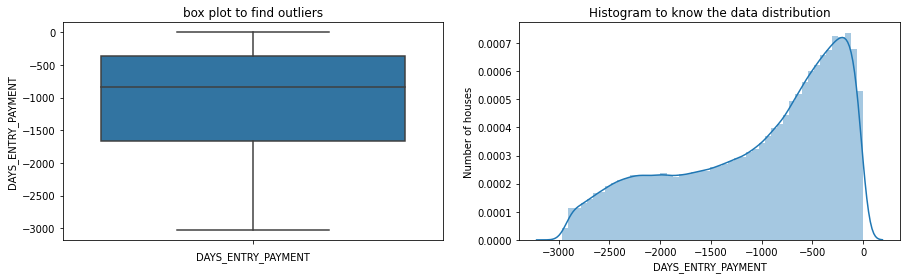

In [ ]:
for var in continuous:
 plt.figure(figsize=(15,4))
 plt.subplot(1,2,1)
 fig=sns.boxplot(y=data[var])
 fig.set_title('box plot to find outliers')
 fig.set_xlabel(var)
 plt.subplot(1,2,2)
 fig=sns.distplot(data[var].dropna())
 fig.set_title('Histogram to know the data distribution')
 fig.set_xlabel(var)
 fig.set_ylabel('Number of houses')
 plt.show()

In [ ]:
data.shape

(307511, 32)

In [ ]:
data.select_dtypes(include=['int','float']).columns

Index(['REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'TARGET', 'MONTHS_BALANCE',
       'CNT_INSTALMENT_FUTURE', 'CNT_INSTALMENT', 'CREDIT_DAY_OVERDUE',
       'CNT_CREDIT_PROLONG', 'MON_BALANCE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT'],
      dtype='object')

## **Outliers removal using std**

In [ ]:
d1=data.MONTHS_BALANCE
upper=d1.mean()+3*d1.std()
lower=d1.mean()-3*d1.std()
data[(d1>upper)|(d1<lower)]
data=data[(d1<upper)&(d1>lower)]
data.shape

(306617, 32)

In [ ]:
d1=data.HOUR_APPR_PROCESS_START
upper=d1.mean()+3*d1.std()
lower=d1.mean()-3*d1.std()
data[(d1>upper)|(d1<lower)]
data=data[(d1<upper)&(d1>lower)]
data.shape

(305996, 32)

In [ ]:
d1=data.DAYS_LAST_PHONE_CHANGE
upper=d1.mean()+3*d1.std()
lower=d1.mean()-3*d1.std()
data[(d1>upper)|(d1<lower)]
data=data[(d1<upper)&(d1>lower)]
data.shape

(305361, 32)

In [ ]:
d1=data.AMT_REQ_CREDIT_BUREAU_YEAR
upper=d1.mean()+3*d1.std()
lower=d1.mean()-3*d1.std()
data[(d1>upper)|(d1<lower)]
data=data[(d1<upper)&(d1>lower)]
data.shape

(302019, 32)

In [ ]:
d1=data.CNT_INSTALMENT_FUTURE
upper=d1.mean()+3*d1.std()
lower=d1.mean()-3*d1.std()
data[(d1>upper)|(d1<lower)]
data=data[(d1<upper)&(d1>lower)]
data.shape

(296119, 32)

In [ ]:
d1=data.CNT_INSTALMENT
upper=d1.mean()+3*d1.std()
lower=d1.mean()-3*d1.std()
data[(d1>upper)|(d1<lower)]
data=data[(d1<upper)&(d1>lower)]
data.shape

(291037, 32)

In [ ]:
d1=data.CREDIT_DAY_OVERDUE
upper=d1.mean()+3*d1.std()
lower=d1.mean()-3*d1.std()
data[(d1>upper)|(d1<lower)]
data=data[(d1<upper)&(d1>lower)]
data.shape

(290844, 32)

In [ ]:
d1=data.CNT_CREDIT_PROLONG
upper=d1.mean()+3*d1.std()
lower=d1.mean()-3*d1.std()
data[(d1>upper)|(d1<lower)]
data=data[(d1<upper)&(d1>lower)]
data.shape

(289358, 32)

In [ ]:
d1=data.MON_BALANCE
upper=d1.mean()+3*d1.std()
lower=d1.mean()-3*d1.std()
data[(d1>upper)|(d1<lower)]
data=data[(d1<upper)&(d1>lower)]
data.shape

(289358, 32)

In [ ]:
d1=data.CNT_DRAWINGS_ATM_CURRENT
upper=d1.mean()+3*d1.std()
lower=d1.mean()-3*d1.std()
data[(d1>upper)|(d1<lower)]
data=data[(d1<upper)&(d1>lower)]
data.shape

(284663, 32)

In [ ]:
d1=data.CNT_DRAWINGS_CURRENT
upper=d1.mean()+3*d1.std()
lower=d1.mean()-3*d1.std()
data[(d1>upper)|(d1<lower)]
data=data[(d1<upper)&(d1>lower)]
data.shape

(281045, 32)

In [ ]:
d1=data.CNT_DRAWINGS_OTHER_CURRENT
upper=d1.mean()+3*d1.std()
lower=d1.mean()-3*d1.std()
data[(d1>upper)|(d1<lower)]
data=data[(d1<upper)&(d1>lower)]
data.shape

(280157, 32)

In [ ]:
d1=data.CNT_DRAWINGS_POS_CURRENT
upper=d1.mean()+3*d1.std()
lower=d1.mean()-3*d1.std()
data[(d1>upper)|(d1<lower)]
data=data[(d1<upper)&(d1>lower)]
data.shape

(273106, 32)

In [ ]:
d1=data.NUM_INSTALMENT_VERSION
upper=d1.mean()+3*d1.std()
lower=d1.mean()-3*d1.std()
data[(d1>upper)|(d1<lower)]
data=data[(d1<upper)&(d1>lower)]
data.shape

(269457, 32)

In [ ]:
d1=data.NUM_INSTALMENT_NUMBER
upper=d1.mean()+3*d1.std()
lower=d1.mean()-3*d1.std()
data[(d1>upper)|(d1<lower)]
data=data[(d1<upper)&(d1>lower)]
data.shape

(262165, 32)

In [ ]:
d1=data.DAYS_INSTALMENT
upper=d1.mean()+3*d1.std()
lower=d1.mean()-3*d1.std()
data[(d1>upper)|(d1<lower)]
data=data[(d1<upper)&(d1>lower)]
data.shape

(262165, 32)

In [ ]:
d1=data.DAYS_ENTRY_PAYMENT
upper=d1.mean()+3*d1.std()
lower=d1.mean()-3*d1.std()
data[(d1>upper)|(d1<lower)]
data=data[(d1<upper)&(d1>lower)]
data.shape

(262165, 32)

In [ ]:
data.shape

(262165, 32)

## **LabelEncoder is used to encode the categorical values**

In [ ]:
cat_col=data.select_dtypes(exclude=[np.number])
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

for feat in cat_col:
  data[feat]=label.fit_transform(data[feat].astype(str))

In [ ]:
x=data.drop(['TARGET'],axis=1)
y=data[['TARGET']]

#**MinmaxScaler is used to the scale the features**

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
model_max=MinMaxScaler()

In [ ]:
print(model_max.fit(x))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [ ]:
print(model_max.data_max_)

[  2.           7.           4.          17.           3.
  21.          57.           0.85499967   0.89600955   0.
   7.          -1.          51.          57.           3.
   3.         104.           0.          12.           0.
   7.           3.           4.           0.           1.
   3.         100.          -2.          -2.           6.
  26.        ]


In [ ]:
data1=model_max.transform(x)
data1

array([[0.5       , 1.        , 1.        , ..., 0.60813492, 0.33333333,
        0.69230769],
       [0.        , 0.57142857, 0.25      , ..., 0.28769841, 0.66666667,
        1.        ],
       [0.5       , 1.        , 1.        , ..., 0.97982804, 0.83333333,
        1.        ],
       ...,
       [0.        , 0.42857143, 1.        , ..., 0.93154762, 1.        ,
        1.        ],
       [0.        , 1.        , 0.25      , ..., 0.44940476, 1.        ,
        1.        ],
       [0.        , 0.14285714, 1.        , ..., 0.36375661, 0.83333333,
        1.        ]])

In [ ]:
scaled_data=pd.DataFrame(data1, columns = x.columns)
scaled_data

,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,MONTHS_BALANCE,CNT_INSTALMENT_FUTURE,CNT_INSTALMENT,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,CREDIT_TYPE,MON_BALANCE,STATUS,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,WEEKDAY_APPR_PROCESS_START,NAME_GOODS_CATEGORY
0,0.5,1.000000,1.00,0.470588,0.5,0.388889,0.087719,0.307542,0.155054,0.670636,0.142857,0.680851,0.882353,0.839286,0.666667,0.0,0.0,0.0,0.250000,1.000000,0.857143,0.000000,0.25,0.0,1.0,0.333333,0.050505,0.596575,0.608135,0.333333,0.692308
1,0.0,0.571429,0.25,0.176471,0.0,0.444444,0.684211,0.727773,0.597163,0.759512,0.000000,0.659574,0.686275,0.625000,0.000000,0.0,0.0,0.0,0.333333,0.989583,0.857143,0.333333,0.25,0.0,0.0,0.000000,0.333333,0.262329,0.287698,0.666667,1.000000
2,0.5,1.000000,1.00,0.470588,0.5,0.333333,0.192982,0.650190,0.814130,0.763288,0.000000,0.670213,0.176471,0.196429,0.000000,0.0,0.0,0.0,0.250000,0.979167,0.857143,0.000000,0.00,0.0,0.0,0.666667,0.000000,0.979110,0.979828,0.833333,1.000000
3,0.0,1.000000,1.00,0.470588,0.5,0.777778,0.087719,0.760751,0.597163,0.820796,0.142857,0.638298,0.823529,0.839286,0.000000,0.0,0.0,0.0,0.333333,0.968750,0.857143,0.333333,0.25,0.0,0.0,0.333333,0.020202,0.172603,0.198413,0.166667,1.000000
4,0.5,1.000000,1.00,0.176471,0.5,0.444444,0.649123,0.377472,0.597163,0.678769,0.000000,0.638298,0.686275,0.625000,0.000000,0.0,0.0,0.0,0.250000,0.958333,0.857143,0.000000,0.25,0.0,1.0,0.333333,0.010101,0.527055,0.548942,0.666667,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262160,0.0,0.428571,1.00,0.470588,0.5,0.666667,1.000000,0.405136,0.828218,1.000000,0.000000,0.808511,0.313725,0.410714,0.000000,0.0,0.0,0.0,0.250000,0.916667,0.857143,0.000000,0.00,0.0,0.0,0.333333,0.050505,0.173630,0.200397,0.833333,1.000000
262161,0.5,1.000000,1.00,0.823529,0.0,0.666667,0.754386,0.797231,0.597163,0.920709,0.142857,0.904255,0.039216,0.196429,0.000000,0.0,0.0,0.0,0.250000,0.906250,0.857143,0.000000,0.00,0.0,0.0,0.333333,0.161616,0.965068,0.966270,0.833333,1.000000
262162,0.0,0.428571,1.00,0.470588,0.5,0.277778,1.000000,0.135663,0.597163,1.000000,0.142857,0.840426,0.000000,0.267857,0.666667,0.0,0.0,0.0,0.250000,0.895833,0.857143,0.000000,0.00,0.0,0.0,0.333333,0.000000,0.933219,0.931548,1.000000,1.000000
262163,0.0,1.000000,0.25,0.588235,1.0,0.333333,0.684211,0.626575,0.243815,0.445542,0.142857,0.808511,0.019608,0.196429,0.666667,0.0,0.0,0.0,0.250000,0.885417,0.857143,0.000000,0.00,0.0,0.0,0.333333,0.000000,0.430822,0.449405,1.000000,1.000000


In [ ]:
new_data=scaled_data.join(y)
new_data

,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,MONTHS_BALANCE,CNT_INSTALMENT_FUTURE,CNT_INSTALMENT,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,CREDIT_TYPE,MON_BALANCE,STATUS,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,WEEKDAY_APPR_PROCESS_START,NAME_GOODS_CATEGORY,TARGET
0,0.5,1.000000,1.00,0.470588,0.5,0.388889,0.087719,0.307542,0.155054,0.670636,0.142857,0.680851,0.882353,0.839286,0.666667,0.0,0.0,0.0,0.250000,1.000000,0.857143,0.000000,0.25,0.0,1.0,0.333333,0.050505,0.596575,0.608135,0.333333,0.692308,1.0
1,0.0,0.571429,0.25,0.176471,0.0,0.444444,0.684211,0.727773,0.597163,0.759512,0.000000,0.659574,0.686275,0.625000,0.000000,0.0,0.0,0.0,0.333333,0.989583,0.857143,0.333333,0.25,0.0,0.0,0.000000,0.333333,0.262329,0.287698,0.666667,1.000000,0.0
2,0.5,1.000000,1.00,0.470588,0.5,0.333333,0.192982,0.650190,0.814130,0.763288,0.000000,0.670213,0.176471,0.196429,0.000000,0.0,0.0,0.0,0.250000,0.979167,0.857143,0.000000,0.00,0.0,0.0,0.666667,0.000000,0.979110,0.979828,0.833333,1.000000,0.0
3,0.0,1.000000,1.00,0.470588,0.5,0.777778,0.087719,0.760751,0.597163,0.820796,0.142857,0.638298,0.823529,0.839286,0.000000,0.0,0.0,0.0,0.333333,0.968750,0.857143,0.333333,0.25,0.0,0.0,0.333333,0.020202,0.172603,0.198413,0.166667,1.000000,0.0
4,0.5,1.000000,1.00,0.176471,0.5,0.444444,0.649123,0.377472,0.597163,0.678769,0.000000,0.638298,0.686275,0.625000,0.000000,0.0,0.0,0.0,0.250000,0.958333,0.857143,0.000000,0.25,0.0,1.0,0.333333,0.010101,0.527055,0.548942,0.666667,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262160,0.0,0.428571,1.00,0.470588,0.5,0.666667,1.000000,0.405136,0.828218,1.000000,0.000000,0.808511,0.313725,0.410714,0.000000,0.0,0.0,0.0,0.250000,0.916667,0.857143,0.000000,0.00,0.0,0.0,0.333333,0.050505,0.173630,0.200397,0.833333,1.000000,0.0
262161,0.5,1.000000,1.00,0.823529,0.0,0.666667,0.754386,0.797231,0.597163,0.920709,0.142857,0.904255,0.039216,0.196429,0.000000,0.0,0.0,0.0,0.250000,0.906250,0.857143,0.000000,0.00,0.0,0.0,0.333333,0.161616,0.965068,0.966270,0.833333,1.000000,0.0
262162,0.0,0.428571,1.00,0.470588,0.5,0.277778,1.000000,0.135663,0.597163,1.000000,0.142857,0.840426,0.000000,0.267857,0.666667,0.0,0.0,0.0,0.250000,0.895833,0.857143,0.000000,0.00,0.0,0.0,0.333333,0.000000,0.933219,0.931548,1.000000,1.000000,1.0
262163,0.0,1.000000,0.25,0.588235,1.0,0.333333,0.684211,0.626575,0.243815,0.445542,0.142857,0.808511,0.019608,0.196429,0.666667,0.0,0.0,0.0,0.250000,0.885417,0.857143,0.000000,0.00,0.0,0.0,0.333333,0.000000,0.430822,0.449405,1.000000,1.000000,0.0


In [ ]:
new_data1=new_data.copy()

new_data.to_csv('home_loan_new.csv')

#**Split the data into x and y**

In [ ]:
X=new_data1.iloc[:,:-1]
Y=new_data1[['TARGET']]

#**Split data into train and test**

In [ ]:
#import model to test the model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.shape, x_test.shape, y_test.shape,y_train.shape

((175650, 31), (86515, 31), (86515, 1), (175650, 1))

## **SMOTE is used to balance the data**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
over_smote = SMOTE()

In [ ]:
X_train,Y_train = over_smote.fit_sample(x_train,y_train)

In [ ]:
print(x_train.shape)
print(X_train.shape)

(175650, 31)
(322970, 31)


In [ ]:
print(y_train.shape)
print(Y_train.shape)

(175650, 1)
(322970,)


In [ ]:

Y_train=pd.DataFrame(Y_train, columns = y_train.columns)
X_train=pd.DataFrame(X_train, columns = x_train.columns)

In [ ]:
print(y_train.value_counts())
print(Y_train.value_counts())

TARGET
0         161485
1          14165
dtype: int64
TARGET
1         161485
0         161485
dtype: int64


# **Selected Classification Models and evaluated using different metrics like accuracy, precision, Recall, f1score, AUC and ROC score**

##**Logistic Algorithm**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()
model_log.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_predict = model_log.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=log_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,log_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=log_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=log_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=log_predict))

accuracy score :
 0.5580881927989366
Confusion matrix :
 [[44343 35204]
 [ 3028  3940]]
Recall score:
 0.5654420206659012
Precision score:
 0.10065399550378092
f1 score:
 0.1708882720333102


##**GradientBoostingClassifier Algorithm**

In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier
model_gb=GradientBoostingClassifier()


In [ ]:
model_gb.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gb_predict=model_gb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=gb_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,gb_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=gb_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=gb_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=gb_predict))

accuracy score :
 0.9174478414147835
Confusion matrix :
 [[79300   247]
 [ 6895    73]]
Recall score:
 0.01047646383467279
Precision score:
 0.228125
f1 score:
 0.020032930845225026


## **AdaboostClassifier Algorithm**

In [ ]:
from sklearn.ensemble import  AdaBoostClassifier
model_ab=AdaBoostClassifier()



In [ ]:
model_ab.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
ab_predict=model_ab.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=ab_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,ab_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=ab_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=ab_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=ab_predict))

accuracy score :
 0.8971739004796856
Confusion matrix :
 [[77212  2335]
 [ 6561   407]]
Recall score:
 0.058409873708381174
Precision score:
 0.14843180160466812
f1 score:
 0.08383110195674562


## **XGBOOST Classifier Algorithm**

In [ ]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_predict=model_xgb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=xgb_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,xgb_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=xgb_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=xgb_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=xgb_predict))

accuracy score :
 0.9182800670403977
Confusion matrix :
 [[79394   153]
 [ 6917    51]]
Recall score:
 0.007319173363949483
Precision score:
 0.25
f1 score:
 0.01422197434467373


##**LGBMClassifier Algorithm**

In [ ]:
import lightgbm as lgb
model_lgb=lgb.LGBMClassifier()
model_lgb.fit(X_train,Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgb_predict=model_lgb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=lgb_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,lgb_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=lgb_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=lgb_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=lgb_predict))

accuracy score :
 0.9190776165982778
Confusion matrix :
 [[79464    83]
 [ 6918    50]]
Recall score:
 0.007175660160734788
Precision score:
 0.37593984962406013
f1 score:
 0.01408252358822701


##**RandomForest Classifier Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier()
model_RF.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
RF_predict=model_RF.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=RF_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,RF_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=RF_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=RF_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=RF_predict))

accuracy score :
 0.9188580015026296
Confusion matrix :
 [[79469    78]
 [ 6942    26]]
Recall score:
 0.0037313432835820895
Precision score:
 0.25
f1 score:
 0.007352941176470588


##**DecisionTree Classifier Algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT= DecisionTreeClassifier()
model_DT.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
DT_predict=model_DT.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=DT_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,DT_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=DT_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=DT_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=DT_predict))

accuracy score :
 0.8371843033000058
Confusion matrix :
 [[71257  8290]
 [ 5796  1172]]
Recall score:
 0.16819747416762343
Precision score:
 0.12386387655886705
f1 score:
 0.14266585514303104


## **KNeighborsClassifier Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(metric='euclidean')
model_KNN.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
KNN_predict=model_KNN.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=KNN_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,KNN_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=KNN_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=KNN_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=KNN_predict))

accuracy score :
 0.6465930763451425
Confusion matrix :
 [[53534 26013]
 [ 4562  2406]]
Recall score:
 0.34529276693455796
Precision score:
 0.08466167000950069
f1 score:
 0.13598214033402095


##**Accuracy score before tuning**

In [ ]:
df={'Model':['XGBoost','LGBoost','RandomForest','gradient boosting','Adaboost','Decision Tree','Logistic','KNN'],'accuracy_score':[0.9181,0.9190,0.9188,0.9174,0.8971,0.8371,0.5580,0.6465]}
pd.DataFrame(df)

,Model,accuracy_score
0,XGBoost,0.9181
1,LGBoost,0.9190
2,RandomForest,0.9188
3,gradient boosting,0.9174
4,Adaboost,0.8971
5,Decision Tree,0.8371
6,Logistic,0.5580
7,KNN,0.6465


##**Hyper Parameter Tuning to increase the accuracy score**

## **RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier(
                       criterion='gini', max_depth=25, max_features='auto',
                       n_estimators=200,
                        random_state=None,
                       verbose=0, warm_start=False)
model_RF.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
RF_predict=model_RF.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=RF_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,RF_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=RF_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=RF_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=RF_predict))

accuracy score :
 0.9186615037854707
Confusion matrix :
 [[79456    91]
 [ 6946    22]]
Recall score:
 0.0031572904707233064
Precision score:
 0.19469026548672566
f1 score:
 0.0062138116085298685


##**LGBMClassifier**

In [ ]:
import lightgbm as lgb
model_lgb=lgb.LGBMClassifier( max_depth=-1,learning_rate=0.1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=1, num_leaves=31, objective=None,
               random_state=10, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
model_lgb.fit(X_train,Y_train)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=1, num_leaves=31, objective=None,
               random_state=10, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgb_predict=model_lgb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=lgb_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,lgb_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=lgb_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=lgb_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=lgb_predict))

accuracy score :
 0.918973588395076
Confusion matrix :
 [[79462    85]
 [ 6925    43]]
Recall score:
 0.006171067738231917
Precision score:
 0.3359375
f1 score:
 0.012119503945885004


## **XGBClassifier**

In [ ]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1)
model_xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_predict=model_xgb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=xgb_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,xgb_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=xgb_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=xgb_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=xgb_predict))

accuracy score :
 0.9194128185863724
Confusion matrix :
 [[79465    82]
 [ 6890    78]]
Recall score:
 0.011194029850746268
Precision score:
 0.4875
f1 score:
 0.021885521885521887


## **DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT= DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=31, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')
model_DT.fit(X_train,Y_train)


DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=31, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [ ]:
DT_predict=model_DT.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=DT_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,DT_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=DT_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=DT_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=DT_predict))

accuracy score :
 0.9179333063630585
Confusion matrix :
 [[79386   161]
 [ 6939    29]]
Recall score:
 0.004161882893226177
Precision score:
 0.15263157894736842
f1 score:
 0.008102822017323274


## **LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression(C=2.0, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=15, penalty='l2',
                   random_state=15, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)
model_log.fit(X_train,Y_train)

[LibLinear]

LogisticRegression(C=2.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=15, penalty='l2',
                   random_state=15, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)

In [ ]:
log_predict = model_log.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=log_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,log_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=log_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=log_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=log_predict))

accuracy score :
 0.6749234236837542
Confusion matrix :
 [[53943 25604]
 [ 2520  4448]]
Recall score:
 0.6383467278989667
Precision score:
 0.14801011579928125
f1 score:
 0.2403025391680173


## **KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=2, p=1,
                     weights='uniform')
model_KNN.fit(X_train,Y_train)


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=2, p=1,
                     weights='uniform')

In [ ]:
KNN_predict=model_KNN.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score,f1_score,confusion_matrix 
print('accuracy score :\n',accuracy_score(y_true=y_test,y_pred=KNN_predict))
print('Confusion matrix :\n',confusion_matrix(y_test,KNN_predict))
print('Recall score:\n',recall_score(y_true=y_test,y_pred=KNN_predict))
print('Precision score:\n',precision_score(y_true=y_test,y_pred=KNN_predict))
print('f1 score:\n',f1_score(y_true=y_test,y_pred=KNN_predict))

accuracy score :
 0.7968213604577241
Confusion matrix :
 [[67819 11728]
 [ 5850  1118]]
Recall score:
 0.16044776119402984
Precision score:
 0.08703098240697493
f1 score:
 0.11284950035328555


## **Accuracy score after tuning**

In [ ]:
df={'Model':['XGBoost','LGBoost','RandomForest','gradient boosting','Adaboost','Decision Tree','Logistic','KNN'],'Accuracy_score before tuning':[0.9181,0.9190,0.9188,0.9174,0.8971,0.8371,0.5580,0.6465],'Accuracy_score_after_tuning':[0.9194,0.9190,0.9186,0.9171,0.9010,0.9179,0.6749,0.7968]}
pd.DataFrame(df)

,Model,Accuracy_score before tuning,Accuracy_score_after_tuning
0,XGBoost,0.9181,0.9194
1,LGBoost,0.9190,0.9190
2,RandomForest,0.9188,0.9186
3,gradient boosting,0.9174,0.9171
4,Adaboost,0.8971,0.9010
5,Decision Tree,0.8371,0.9179
6,Logistic,0.5580,0.6749
7,KNN,0.6465,0.7968


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

## **Evaluated KNN and logistic using AUC-ROC Method**

In [ ]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=45)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

### **Finding roc_auc_score for logistic and KNN model** 

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9762374461979914 0.9642440817790532


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)



# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)  

# predict probabilities# auc roc curve

pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)


from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9762374461979914 0.9233769727403157


## **ROC curve**

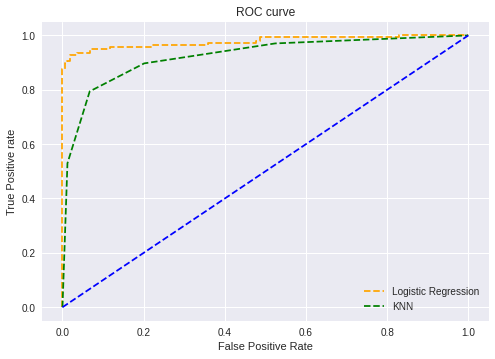

In [ ]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### **AUC for the Logistic Regression ROC curve is higher than that for the KNN ROC curve.logistic regression did a better job of classifying the positive class in the dataset**.

### AUC-ROC for Multi-Class Classification

**we have three classes 0, 1, and 2, the ROC for class 0 will be generated as classifying 0 against not 0, i.e. 1 and 2. The ROC for class 1 will be generated as classifying 1 against not 1, and so on.**

**The ROC curve for multi-class classification models can be determined as below:** 

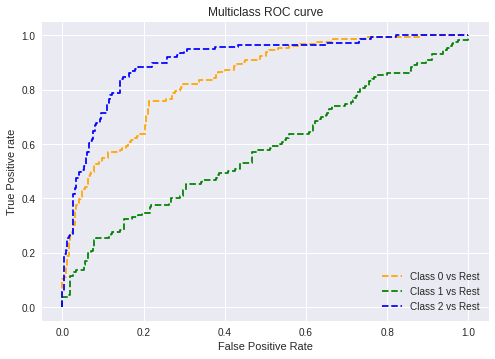

In [ ]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

#**Conclusion**

## **Different classification algorithms like XGB , LGB , Decision Tree, Random Forest and Gradient Boosting has given the best accuracy score around 0.917 i.e 92% better model**.

## **ROC_AUC score of Logistic model is 0.9762**
## **ROC_AUC score KNN model is 0.9233**